Found 2869 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.5803 - loss: 0.9916 - val_accuracy: 0.3680 - val_loss: 1.6940
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.7445 - loss: 0.6060 - val_accuracy: 0.4645 - val_loss: 1.8271
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.8219 - loss: 0.4526 - val_accuracy: 0.5457 - val_loss: 2.1650
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 46s 516ms/step - accuracy: 0.8892 - loss: 0.2952 - val_accuracy: 0.6371 - val_loss: 2.4160
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 445ms/step - accuracy: 0.9125 - loss: 0.2356 - val_accuracy: 0.6751 - val_loss: 3.1330
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 36s 398ms/step - accuracy: 0.9327 - loss: 0.1776 - val_accuracy: 0.6701 - val_loss: 3.3901
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 37s 415ms/step - accuracy: 0.9554 - loss: 0.1311 - val_accuracy: 0.7005 - val_loss: 3.2270
Epoch 8/10
90/90 ━━━

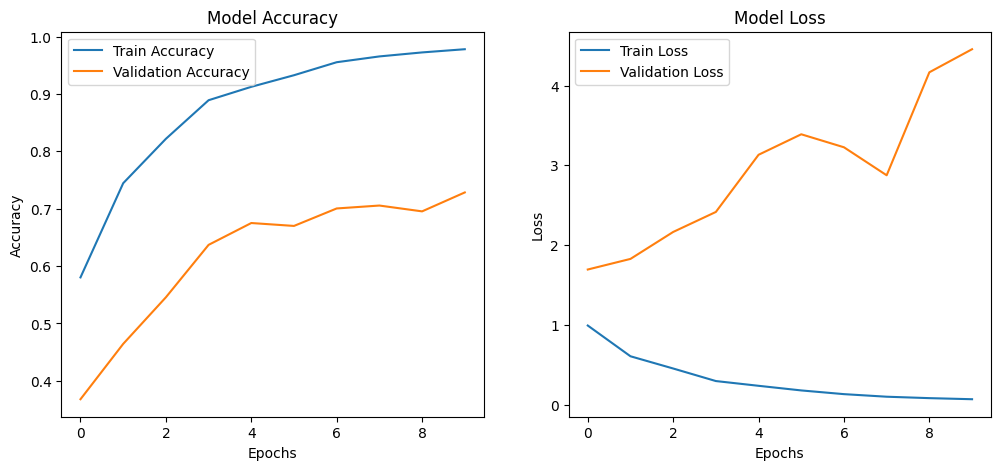

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import random

# Step 1: Define dataset paths
train_dir = r"C:\Users\HP\Downloads\brain tumour\Training"
test_dir = r"C:\Users\HP\Downloads\brain tumour\Testing"

# Step 2: Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Step 3: Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 output classes
])

# Step 4: Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 5: Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")

# Step 7: Plot accuracy and loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Show 5 test images with predicted & actual labels (simplified)
x_test_batch, y_test_batch = next(test_generator)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


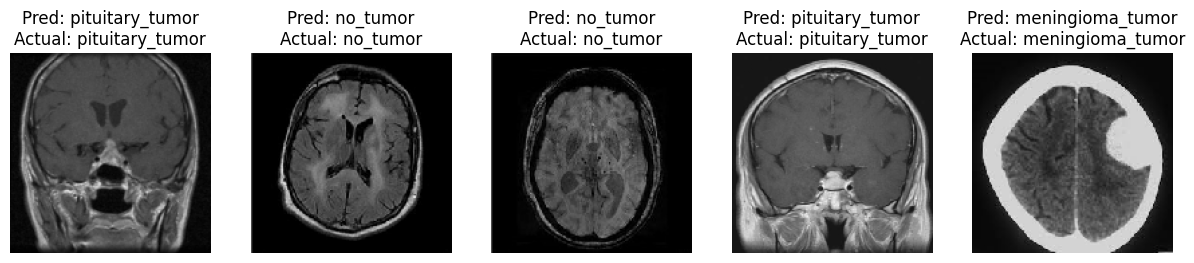

In [14]:
class_labels = list(train_generator.class_indices.keys())
plt.figure(figsize=(15,4))
for i in range(5):
    img = x_test_batch[i]
    true_label = class_labels[np.argmax(y_test_batch[i])]
    
    pred = model.predict(img[np.newaxis, ...])
    predicted_label = class_labels[np.argmax(pred)]

    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.title(f"Pred: {predicted_label}\nActual: {true_label}")
    plt.axis("off")